In [ ]:
##############################################################################################
import keras
keras.backend.clear_session()

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import scipy.io

# Specify the folder path containing the MAT files
ad_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/AD_features_P_agematched.mat"
he_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/HE_features_P_agematched.mat"

# Load data from AD and HE folders
ad_data = scipy.io.loadmat(ad_folder)['AD_features_P_agematched']
he_data = scipy.io.loadmat(he_folder)['HE_features_P_agematched']

np.random.shuffle(ad_data)
np.random.shuffle(he_data)


characters=['Variance','Skewness','Kurtosis','Shape Factor','Peak Amp','Impulse factor','Crest factor','clearance factor','Willison Amp','ZCR','Sample Entropy','Approx. Entropy',
           'permutation entropy','state space corr ent','corr dim','Higuchi Fractal dimension','Katz Fractal dim','Lyapunov Exp','Hurst Exponent',
           'Lempel-Ziv Complexity','Hjorth Activity','Hjorth Mobility','Hjorth Complexity','alpha dominant freq','gamma dominant freq','Spectral Roll Off',
           'Spectral Centroid','Spectral Spread','Spectral Flux','Spectral Skewness','Spectral Kurtosis','Theta Beta Ratio','Theta Alpha Ratio',
           'Gamma alpha ratio','Spectral Power Ratio','Wavelet Energy Approx','Wavelet Energy Detail','Relative Wavelet Energy','Wavelet Packet Energy Approx',
            'Wavelet Packet Energy Detail','Relative Wavelet Packet Energy']
print(len(characters))

# new_ind = list(range(23)) + list(range(25,43)) # Removing 'Dominant Frequency' and 'Median Frequency' features
# print(new_ind)
# characters_subset=[characters[i] for i in new_ind]
# print(characters_subset)
# print(len(characters_subset))

ad_train_test = ad_data[0:1380, :]
he_train_test = he_data[0:1380, :]

ad_unseen = ad_data[1380::, :]
he_unseen = he_data[1380::, :]

# Combine and label the data
X = np.vstack((ad_train_test, he_train_test))
y = np.hstack([np.zeros(len(ad_train_test)), np.ones(len(he_train_test))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)             




# Set the number of runs
num_runs = 20

# Lists to store the models and test accuracies
models = []
test_accuracies = []
histories = []

for run in range(num_runs):
    print(f"Training Run {run + 1}/{num_runs}")

    # Clear previous session
    keras.backend.clear_session()

    # Define the neural network model
    model = Sequential()
    model.add(Dense(36, activation='relu', input_shape=(41,)))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(18, activation='relu'))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True),
                                   ModelCheckpoint(f'best6_model_{run}.h5', save_best_only=True)])

    # Save the model and append to the list
    models.append(model)
    histories.append(history)    

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    test_accuracies.append(test_acc)

# Calculate and print the average test accuracy
average_test_accuracy = np.mean(test_accuracies)
print(f'Average Test Accuracy: {average_test_accuracy}')

41
Training Run 1/20


/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2024-01-24 10:24:38.210503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-24 10:24:39.512463: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 176 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:62:00.0, compute capability: 7.0
2024-01-24 10:24:39.513356: I tensorflow/core/common_runtime/gpu/gpu_device.

Epoch 1/1000
130/130 [==============================] - 2s 5ms/step - loss: 7.6458 - accuracy: 0.5300 - val_loss: 1.7702 - val_accuracy: 0.5536
Epoch 2/1000
130/130 [==============================] - 0s 3ms/step - loss: 1.3378 - accuracy: 0.5768 - val_loss: 0.8647 - val_accuracy: 0.5754
Epoch 3/1000
130/130 [==============================] - 0s 3ms/step - loss: 1.0603 - accuracy: 0.5705 - val_loss: 0.8663 - val_accuracy: 0.5783
Epoch 4/1000
130/130 [==============================] - 0s 3ms/step - loss: 1.2578 - accuracy: 0.5807 - val_loss: 1.3099 - val_accuracy: 0.5507
Epoch 5/1000
130/130 [==============================] - 0s 4ms/step - loss: 1.1632 - accuracy: 0.5986 - val_loss: 0.7936 - val_accuracy: 0.6435
Epoch 6/1000
130/130 [==============================] - 1s 4ms/step - loss: 0.9426 - accuracy: 0.5812 - val_loss: 1.2932 - val_accuracy: 0.5319
Epoch 7/1000
130/130 [==============================] - 0s 4ms/step - loss: 1.1194 - accuracy: 0.5807 - val_loss: 0.9779 - val_accuracy:

In [3]:
import tensorflow as tf

model_names = [f'seq{run + 1}' for run in range(num_runs)]

models = [models[i] for i in range(num_runs)] 

for run in range(num_runs):
    models[run]._name = f'seq{run + 1}'


model_input = tf.keras.Input(shape=(41,))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [4]:
# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the ensemble model on the test set
ensemble_test_loss, ensemble_test_acc = ensemble_model.evaluate(X_test, y_test)
print(f'Ensemble Test Accuracy: {ensemble_test_acc}')


22/22 [==============================] - 1s 12ms/step - loss: 0.4947 - accuracy: 0.7739
Ensemble Test Accuracy: 0.7739130258560181


In [5]:
for n in range(0,20):
    models[n].compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Evaluate the ensemble model on the test set
    t_loss, t_acc = models[n].evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7507


In [11]:
# import matplotlib.pyplot as plt
# i=16
# # Plot training and validation loss
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(histories[i].history['loss'], label='Training Loss')
# plt.plot(histories[i].history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(histories[i].history['accuracy'], label='Training Accuracy')
# plt.plot(histories[i].history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # models[i].summary()
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 41)]         0           []                               
                                                                                                  
 seq1 (Sequential)              (None, 2)            2216        ['input_1[0][0]']                
                                                                                                  
 seq2 (Sequential)              (None, 2)            2216        ['input_1[0][0]']                
                                                                                                  
 seq3 (Sequential)              (None, 2)            2216        ['input_1[0][0]']                
                                                                                              

PermutationExplainer explainer: 2761it [08:45,  5.22it/s]                          


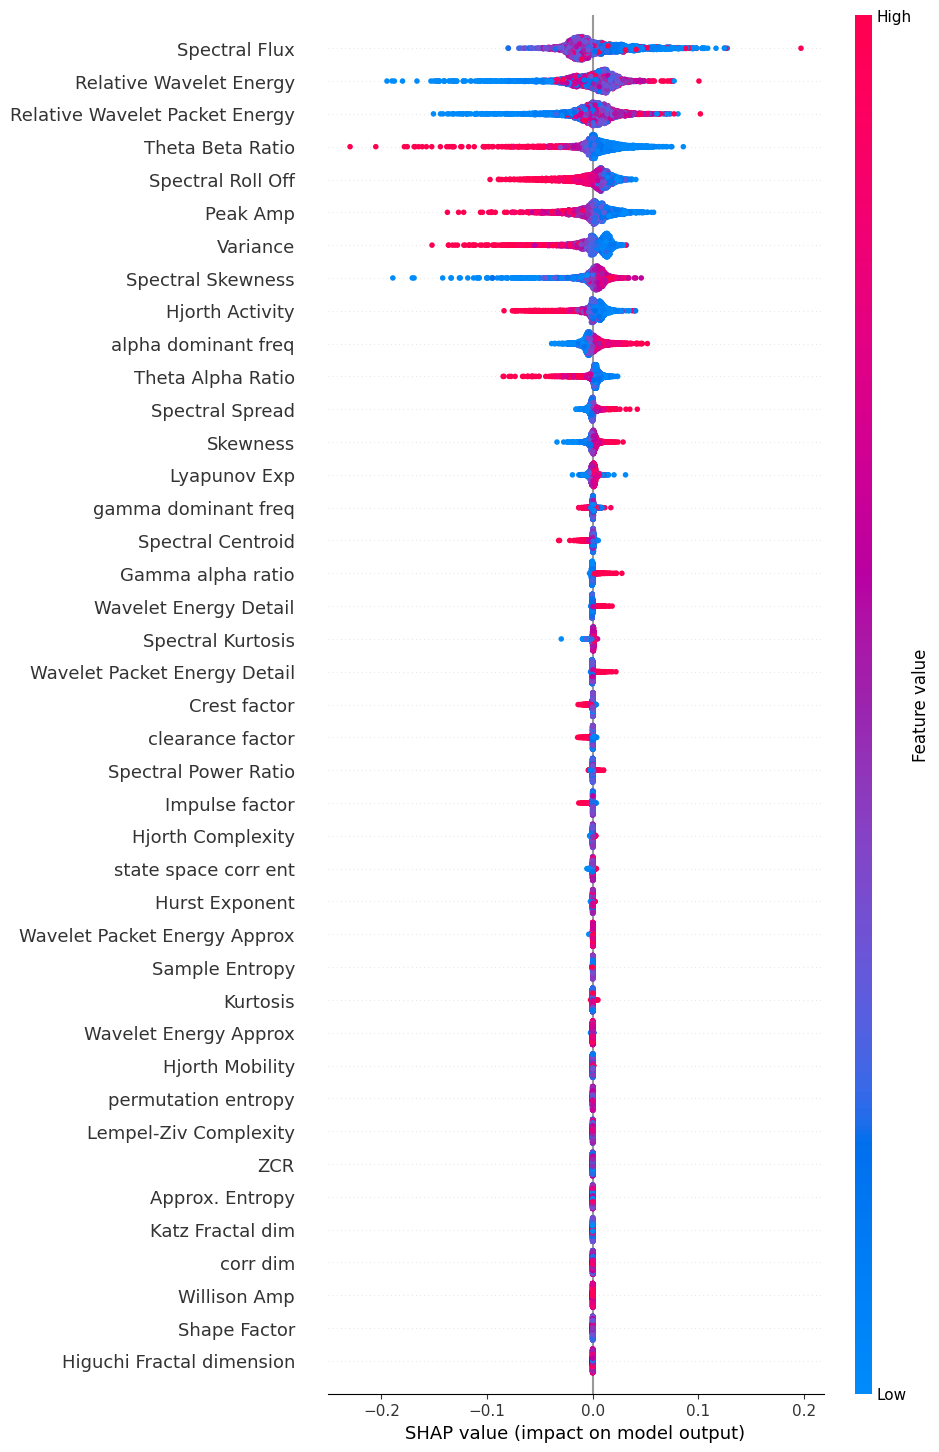

In [10]:
import shap
explainer = shap.Explainer(ensemble_model, X,feature_names=characters)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values[:,:,0], max_display=41)

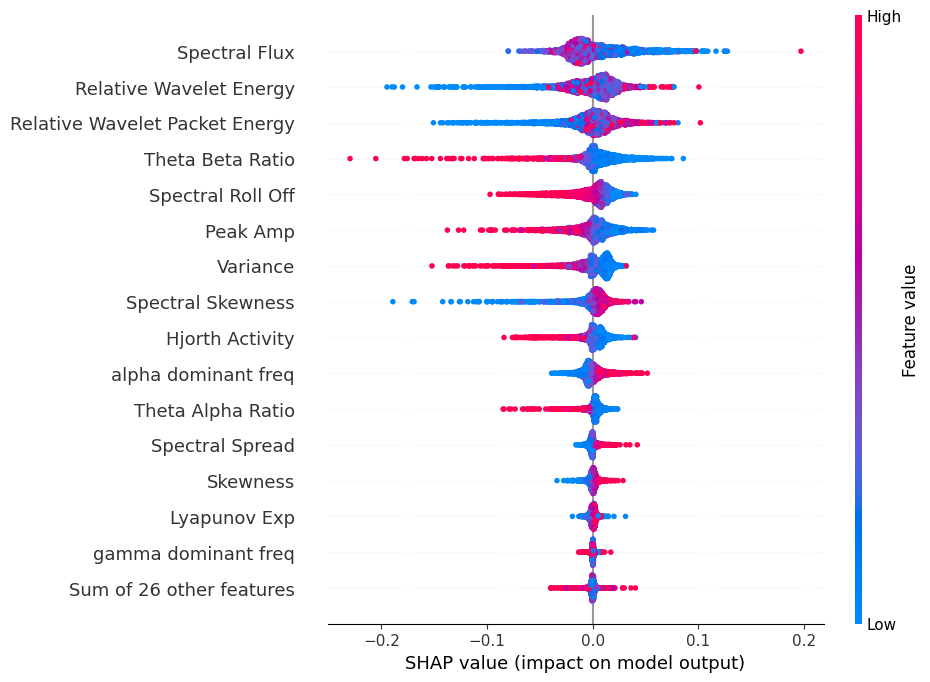

In [13]:
shap.plots.beeswarm(shap_values[:,:,0], max_display=16)

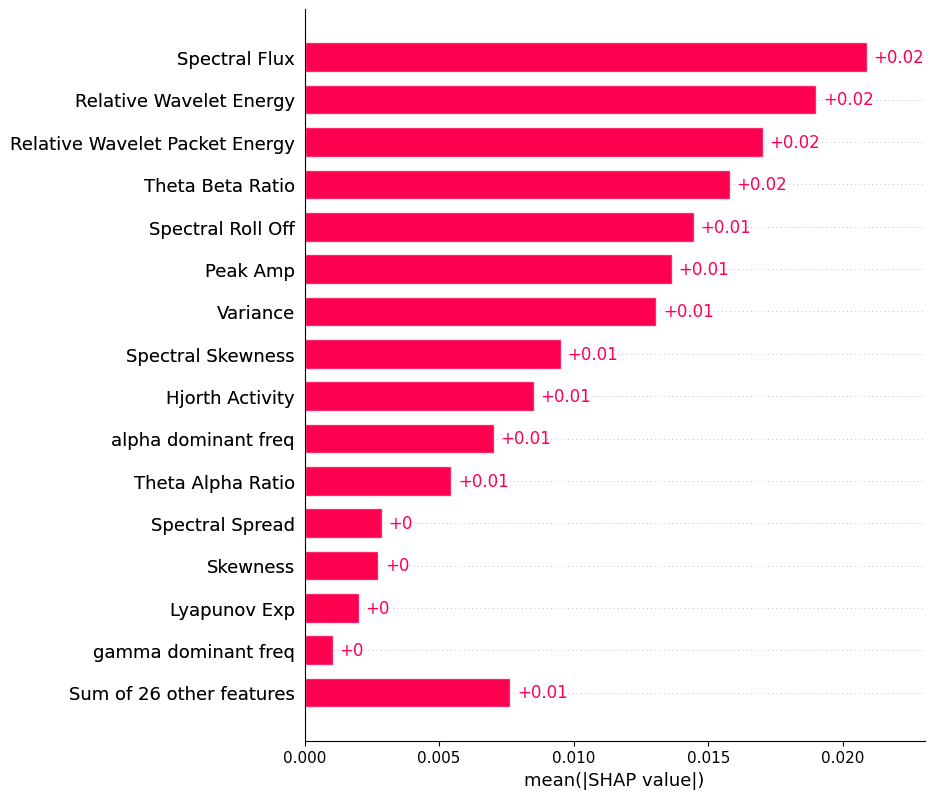

In [12]:
shap.plots.bar(shap_values[:,:,0].abs.mean(0), max_display=16)

In [ ]:
##############################################################################################
import keras
keras.backend.clear_session()

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import scipy.io

# Specify the folder path containing the MAT files
ad_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/AD_features_ASR_agematched.mat"
he_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/HE_features_ASR_agematched.mat"

# Load data from AD and HE folders
ad_data = scipy.io.loadmat(ad_folder)['AD_features_ASR_agematched']
he_data = scipy.io.loadmat(he_folder)['HE_features_ASR_agematched']

np.random.shuffle(ad_data)
np.random.shuffle(he_data)


characters=['Variance','Skewness','Kurtosis','Shape Factor','Peak Amp','Impulse factor','Crest factor','clearance factor','Willison Amp','ZCR','Sample Entropy','Approx. Entropy',
           'permutation entropy','state space corr ent','corr dim','Higuchi Fractal dimension','Katz Fractal dim','Lyapunov Exp','Hurst Exponent',
           'Lempel-Ziv Complexity','Hjorth Activity','Hjorth Mobility','Hjorth Complexity','alpha dominant freq','gamma dominant freq','Spectral Roll Off',
           'Spectral Centroid','Spectral Spread','Spectral Flux','Spectral Skewness','Spectral Kurtosis','Theta Beta Ratio','Theta Alpha Ratio',
           'Gamma alpha ratio','Spectral Power Ratio','Wavelet Energy Approx','Wavelet Energy Detail','Relative Wavelet Energy','Wavelet Packet Energy Approx',
            'Wavelet Packet Energy Detail','Relative Wavelet Packet Energy']
print(len(characters))

# new_ind = list(range(23)) + list(range(25,43)) # Removing 'Dominant Frequency' and 'Median Frequency' features
# print(new_ind)
# characters_subset=[characters[i] for i in new_ind]
# print(characters_subset)
# print(len(characters_subset))

ad_train_test = ad_data[0:1380, :]
he_train_test = he_data[0:1380, :]

ad_unseen = ad_data[1380::, :]
he_unseen = he_data[1380::, :]

# Combine and label the data
X = np.vstack((ad_train_test, he_train_test))
y = np.hstack([np.zeros(len(ad_train_test)), np.ones(len(he_train_test))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)             




# Set the number of runs
num_runs = 20

# Lists to store the models and test accuracies
models = []
test_accuracies = []
histories = []

for run in range(num_runs):
    print(f"Training Run {run + 1}/{num_runs}")

    # Clear previous session
    keras.backend.clear_session()

    # Define the neural network model
    model = Sequential()
    model.add(Dense(36, activation='relu', input_shape=(41,)))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(18, activation='relu'))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True),
                                   ModelCheckpoint(f'agematchedASR_model_{run}.h5', save_best_only=True)])

    # Save the model and append to the list
    models.append(model)
    histories.append(history)    

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    test_accuracies.append(test_acc)

# Calculate and print the average test accuracy
average_test_accuracy = np.mean(test_accuracies)
print(f'Average Test Accuracy: {average_test_accuracy}')

41
Training Run 1/20
Epoch 1/1000


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


130/130 [==============================] - 1s 6ms/step - loss: 16.3426 - accuracy: 0.5014 - val_loss: 2.3874 - val_accuracy: 0.4913
Epoch 2/1000
130/130 [==============================] - 1s 5ms/step - loss: 1.3493 - accuracy: 0.5058 - val_loss: 1.9473 - val_accuracy: 0.5087
Epoch 3/1000
130/130 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.5232 - val_loss: 0.9775 - val_accuracy: 0.4913
Epoch 4/1000
130/130 [==============================] - 0s 4ms/step - loss: 1.2642 - accuracy: 0.5246 - val_loss: 0.7975 - val_accuracy: 0.6029
Epoch 5/1000
130/130 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.5589 - val_loss: 0.8997 - val_accuracy: 0.5174
Epoch 6/1000
130/130 [==============================] - 0s 3ms/step - loss: 1.1304 - accuracy: 0.5261 - val_loss: 0.8227 - val_accuracy: 0.5797
Epoch 7/1000
130/130 [==============================] - 0s 3ms/step - loss: 0.9269 - accuracy: 0.5734 - val_loss: 1.2255 - val_accuracy: 0.4986
Epoc

In [15]:
import tensorflow as tf

model_names = [f'seq{run + 1}' for run in range(num_runs)]

models = [models[i] for i in range(num_runs)] 

for run in range(num_runs):
    models[run]._name = f'seq{run + 1}'


model_input = tf.keras.Input(shape=(41,))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [16]:
# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the ensemble model on the test set
ensemble_test_loss, ensemble_test_acc = ensemble_model.evaluate(X_test, y_test)
print(f'Ensemble Test Accuracy: {ensemble_test_acc}')


22/22 [==============================] - 1s 5ms/step - loss: 0.4996 - accuracy: 0.7638
Ensemble Test Accuracy: 0.7637681365013123


In [17]:
for n in range(0,20):
    models[n].compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Evaluate the ensemble model on the test set
    t_loss, t_acc = models[n].evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7333


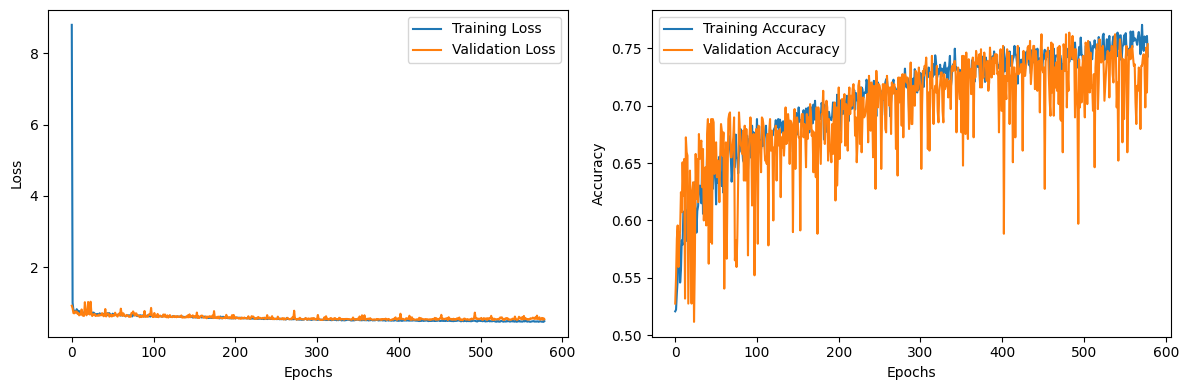

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 41)]         0           []                               
                                                                                                  
 seq1 (Sequential)              (None, 2)            2216        ['input_1[0][0]']                
                                                                                                  
 seq2 (Sequential)              (None, 2)            2216        ['input_1[0][0]']                
                                                                                                  
 seq3 (Sequential)              (None, 2)            2216        ['input_1[0][0]']                
                                                                                              

In [18]:
import matplotlib.pyplot as plt
i=16
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(histories[i].history['loss'], label='Training Loss')
plt.plot(histories[i].history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(histories[i].history['accuracy'], label='Training Accuracy')
plt.plot(histories[i].history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# models[i].summary()
ensemble_model.summary()

PermutationExplainer explainer: 2761it [08:40,  5.20it/s]                          


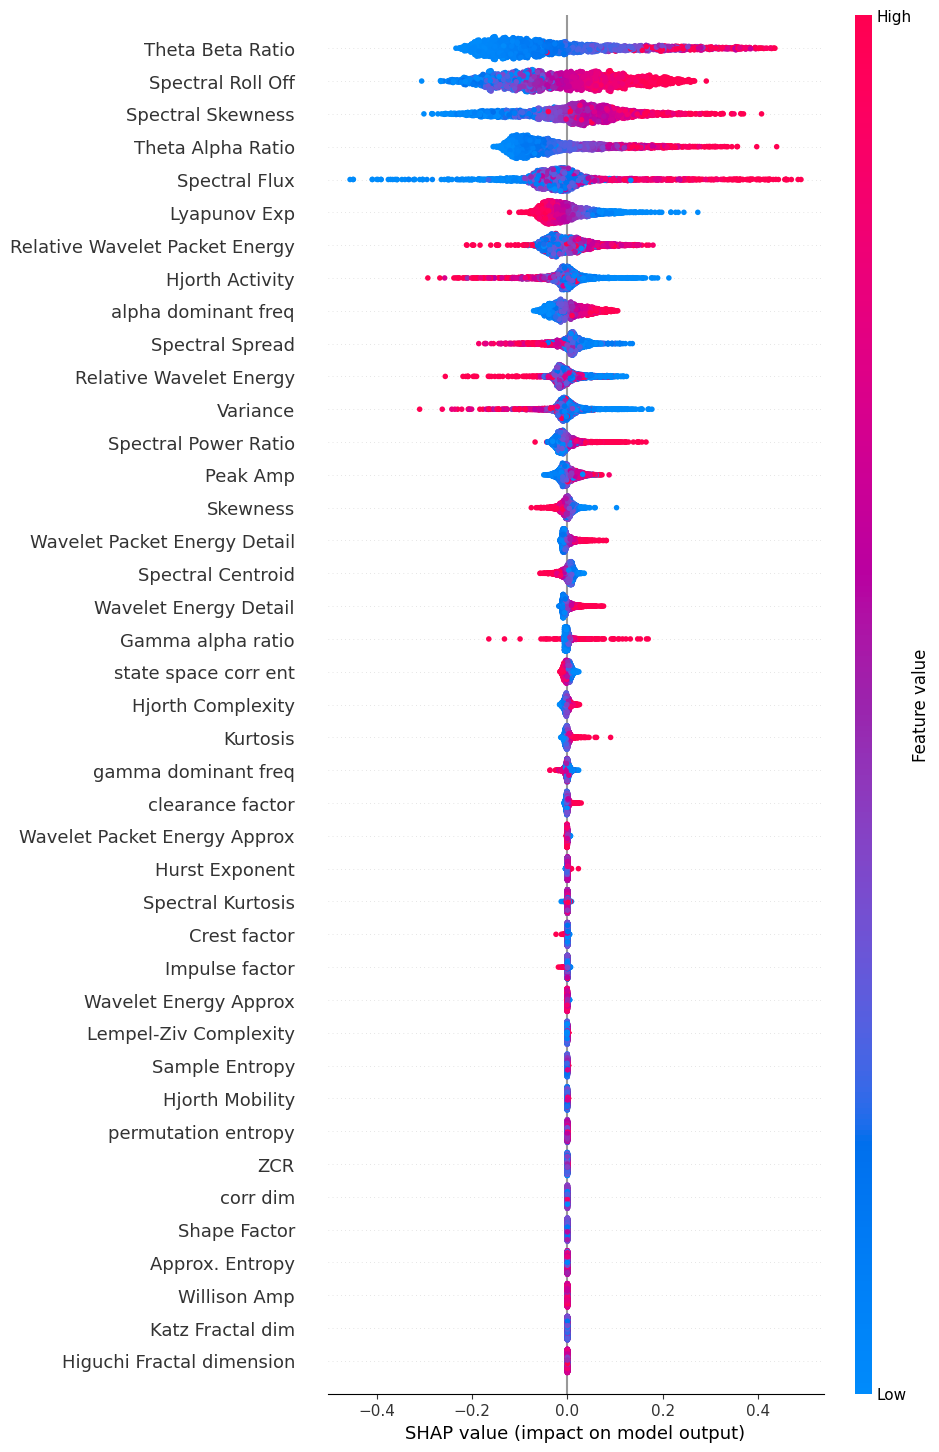

In [19]:
import shap
explainer = shap.Explainer(ensemble_model, X,feature_names=characters)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values[:,:,0], max_display=41)

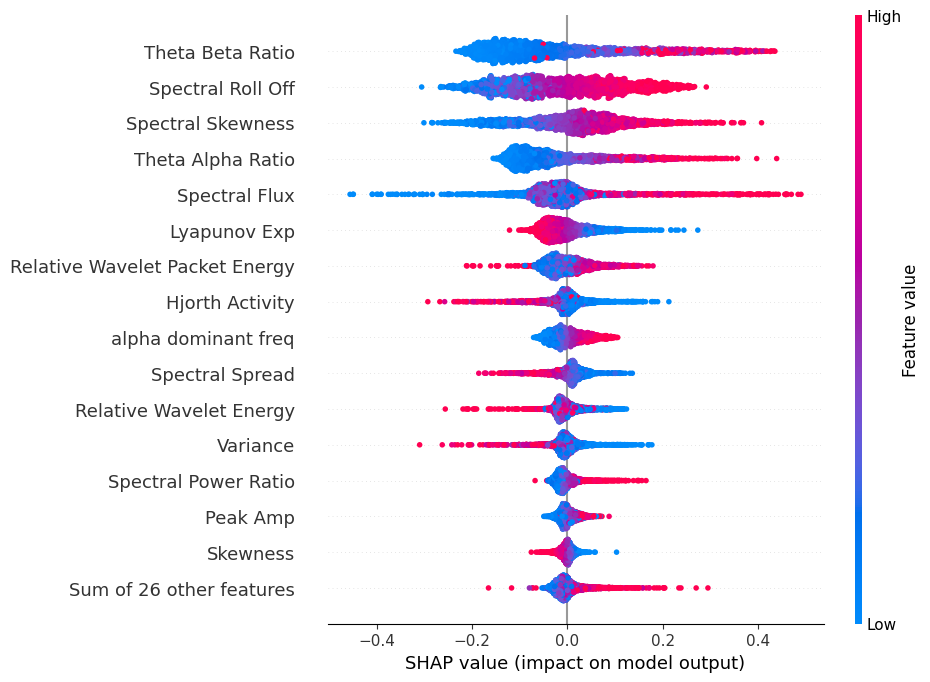

In [20]:
shap.plots.beeswarm(shap_values[:,:,0], max_display=16)

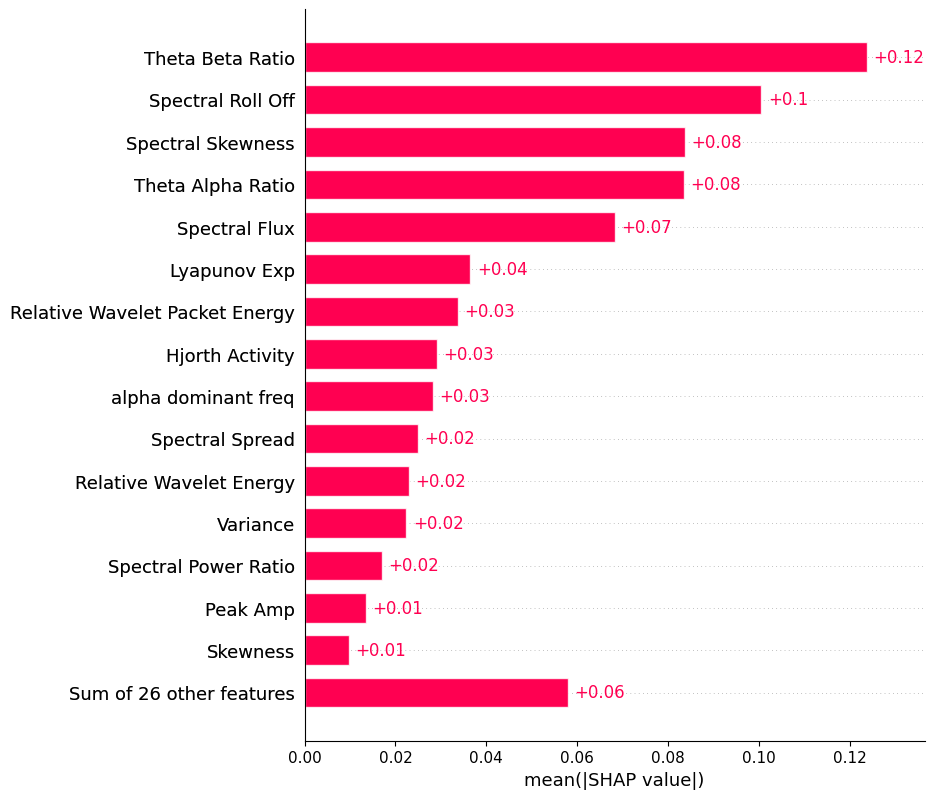

In [21]:
shap.plots.bar(shap_values[:,:,0].abs.mean(0), max_display=16)

In [2]:
list_ASR = ['Theta Beta Ratio', 'Spectral Roll Off','Spectral Skewness','Theta Alpha Ratio','Spectral Flux','Lyapunov Exponent','Relative Wavelet Packet Energy',
              'Hjorth Activity', 'Alpha Dominant Frequency', 'Spectral Speread','Relative Wavelet Energy','Variance','Spectral Power Ratio',
            'Peak Amplitude','Skewness']
list_Hampel = ['Spectral Flux', 'Relative Wavelet Energy', 'Relative Wavelet Packet Energy', 'Theta Beta Ratio', 'Spectral Roll Off', 'Peak Amplitude',
              'Variance','Spectral Skewness','Hjorth Activity','Alpha Dominant Frequency','Theta Alpha Ratio','Spectral Spread','Skewness',
               'Lyapunov Exponent','Gamma Dominant Frequency']

common_elements = [element for element in list_ASR if element in list_Hampel]
print(common_elements)
#COHORT 1

['Theta Beta Ratio', 'Spectral Roll Off', 'Spectral Skewness', 'Theta Alpha Ratio', 'Spectral Flux', 'Lyapunov Exponent', 'Relative Wavelet Packet Energy', 'Hjorth Activity', 'Alpha Dominant Frequency', 'Relative Wavelet Energy', 'Variance', 'Peak Amplitude', 'Skewness']
